# Notebook for Training with Faster RCNN

We'll import code from the scripts folder so we don't have to clutter this notebook

In [3]:
%matplotlib inline

import albumentations as A
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns
import sys
import torch
import torchvision

from albumentations import OneOf

sys.path.append(os.path.join('..', 'scripts'))
from models import WheatModel
from evaluation import calculate_image_precision

sns.set()

%load_ext autoreload
%autoreload

ALLOW_AUTOMATIC_SHUTDOWN = True # allow the script to automatically shutdown your computer after use.

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Iteration #50 loss: 0.9649847745895386
Iteration #100 loss: 0.9855483770370483
Iteration #150 loss: 1.2676886320114136
Iteration #200 loss: 0.8923354744911194
Iteration #250 loss: 1.0085676908493042
Iteration #300 loss: 1.1250332593917847
Iteration #350 loss: 0.7620633840560913
Iteration #400 loss: 0.8207167387008667
Iteration #450 loss: 1.4396610260009766
Iteration #500 loss: 0.9515447616577148
Iteration #550 loss: 0.6735779047012329
Iteration #600 loss: 1.2880480289459229
Iteration #650 loss: 0.8417127132415771
Iteration #700 loss: 0.6464428901672363
Iteration #750 loss: 0.6992817521095276
Iteration #800 loss: 0.8090012073516846
Epoch #0 loss: 0.9220735025349387
Iteration #850 loss: 0.7021587491035461
Iteration #900 loss: 0.671949028968811
Iteration #950 loss: 0.9636032581329346
Iteration #1000 loss: 1.0577903985977173
Iteration #1050 loss: 0.695507287979126
Iteration #1100 loss: 1.174917221069336
Iteration #1150 loss: 0.43070119619369507
Iteration #1200 loss: 0.8783280849456787
Iter

Iteration #9650 loss: 0.69765704870224
Iteration #9700 loss: 0.602325439453125
Iteration #9750 loss: 0.7774344682693481
Iteration #9800 loss: 1.0989221334457397
Iteration #9850 loss: 0.6745408773422241
Iteration #9900 loss: 0.9082103967666626
Iteration #9950 loss: 0.8992982506752014
Iteration #10000 loss: 1.1618494987487793
Iteration #10050 loss: 0.6833784580230713
Iteration #10100 loss: 0.4081493020057678
Epoch #11 loss: 0.7581960229794561
Iteration #10150 loss: 0.5227447152137756
Iteration #10200 loss: 1.0398170948028564
Iteration #10250 loss: 0.5749078392982483
Iteration #10300 loss: 0.746435821056366
Iteration #10350 loss: 0.9032396078109741
Iteration #10400 loss: 0.9606798887252808
Iteration #10450 loss: 0.6112854480743408
Iteration #10500 loss: 0.6803999543190002
Iteration #10550 loss: 1.0831109285354614
Iteration #10600 loss: 0.680329442024231
Iteration #10650 loss: 0.9586106538772583
Iteration #10700 loss: 0.8789680600166321
Iteration #10750 loss: 0.6889426708221436
Iteration #

Iteration #19000 loss: 0.7321584224700928
Iteration #19050 loss: 0.6284991502761841
Iteration #19100 loss: 0.9435328245162964
Iteration #19150 loss: 0.8551903963088989
Iteration #19200 loss: 1.1568272113800049
Iteration #19250 loss: 0.4381164610385895
Iteration #19300 loss: 0.7114167213439941
Iteration #19350 loss: 0.7368835210800171
Iteration #19400 loss: 0.759033203125
Epoch #22 loss: 0.7581893588588419
Iteration #19450 loss: 0.5139113068580627
Iteration #19500 loss: 0.6832528114318848
Iteration #19550 loss: 0.674243152141571
Iteration #19600 loss: 0.5204285383224487
Iteration #19650 loss: 0.7783549427986145
Iteration #19700 loss: 0.5558196306228638
Iteration #19750 loss: 0.37311679124832153
Iteration #19800 loss: 0.9157054424285889
Iteration #19850 loss: 1.241378664970398
Iteration #19900 loss: 0.49291807413101196
Iteration #19950 loss: 0.5171507000923157
Iteration #20000 loss: 0.7499657869338989
Iteration #20050 loss: 0.5523121356964111
Iteration #20100 loss: 0.5247125029563904
Ite

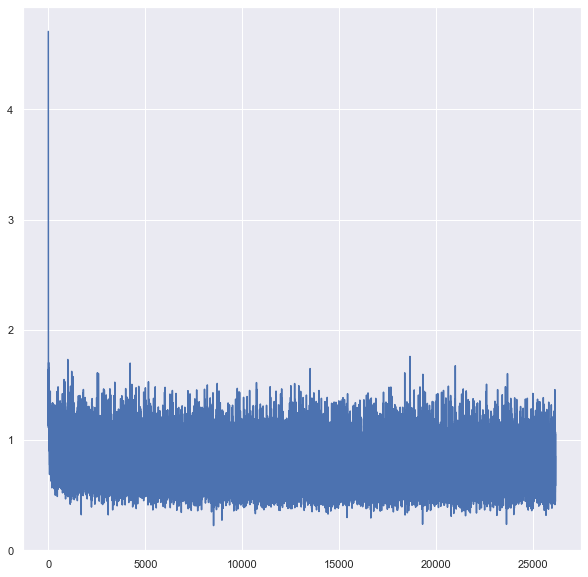

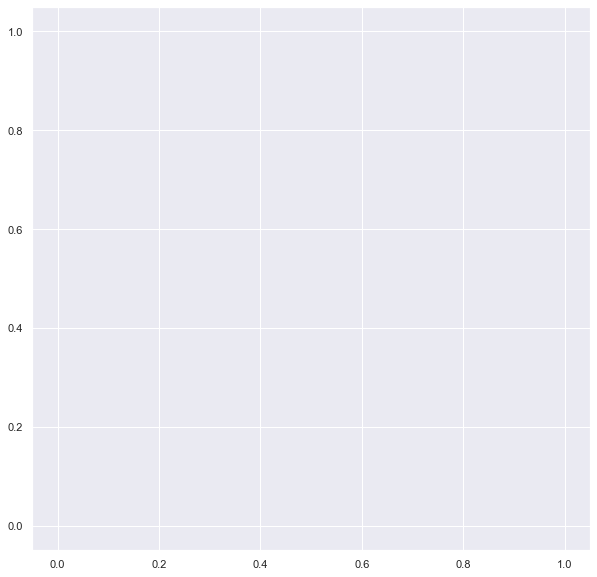

In [4]:
%%time
base_path = os.path.join('..', 'data')

model = WheatModel(
    base_path=base_path,
    num_epochs=31,
    train_val_split=1,
    transforms=[A.Flip(0.5), 
#                     A.RandomBrightnessContrast(), 
                OneOf([
                    A.RandomBrightnessContrast(), 
                    A.HueSaturationValue()
                ], p=0.5),
                OneOf([
                    A.MotionBlur()
                ])
               ]
)
loss, precisions=model.main()
plt.figure(figsize=(10, 10))
plt.plot(loss)
plt.figure(figsize=(10, 10))
plt.plot(precisions)
model.save_params()

# Validation

In [2]:
base_path = os.path.join('..', 'data')

model = WheatModel(
    base_path=base_path,
    num_epochs=1,
    train_val_split=0.8,
    weights_file='faster_rcnn_resnet50_fpn_10epochs.pth'
)

In [6]:
# Our testing sample
sample_id = '1ef16dab1'

gt_boxes = model.train_df[model.train_df['image_id'] == sample_id][['x', 'y', 'w', 'h']].values
gt_boxes = gt_boxes.astype(np.int)

# Ground-truth boxes of our sample
gt_boxes

array([[954, 391,  70,  90],
       [660, 220,  95, 102],
       [ 64, 209,  76,  57],
       [896,  99, 102,  69],
       [747, 460,  72,  77],
       [885, 163, 103,  69],
       [514, 399,  90,  97],
       [702, 794,  97,  99],
       [721, 624,  98, 108],
       [826, 512,  82,  94],
       [883, 944,  79,  74],
       [247, 594, 123,  92],
       [673, 514,  95, 113],
       [829, 847, 102, 110],
       [ 94, 737,  92, 107],
       [588, 568,  75, 107],
       [158, 890, 103,  64],
       [744, 906,  75,  79],
       [826,  33,  72,  74],
       [601,  69,  67,  87]])

In [7]:
def format_prediction_string(boxes, scores):
    pred_strings = []
    for j in zip(scores, boxes):
        pred_strings.append("{0:.4f} {1} {2} {3} {4}".format(j[0], j[1][0], j[1][1], j[1][2], j[1][3]))

    return " ".join(pred_strings)

In [43]:
precisions = []
model.model.eval()
for images, targets, image_ids in model.valid_data_loader:
    images = list(image.to(model.device) for image in images)
    outputs = model.model.forward(images)
    
    for i, image in enumerate(images):
        boxes = outputs[i]['boxes'].data.cpu().numpy()
        scores = outputs[i]['scores'].data.cpu().numpy()

        boxes = boxes[scores >= detection_threshold].astype(np.int32)
        scores = scores[scores >= detection_threshold]
        image_id = image_ids[i]

        boxes[:, 2] = boxes[:, 2] - boxes[:, 0]
        boxes[:, 3] = boxes[:, 3] - boxes[:, 1]

        gt_boxes = model.val_df[model.val_df['image_id'] == image_ids[i]][['x', 'y', 'w', 'h']].values
        image_precision = calculate_image_precision(gt_boxes, boxes)
        precisions.append(image_precision)

print(np.mean(precisions))

('31a6e55f2', 'fd5624913', 'b13f38e6f', '48c72c991')
('42e247347', '556c18af4', '14fd84198', 'c682d8c66')
('4aeb37788', 'e46378032', '798a261f0', '999d9d27d')
('d13e3ffce', '8b558e9e3', '005b0d8bb', 'e99cca2a3')
('4c7fc04f6', '372d12c55', '43e3ccd92', '4e5c1078d')
('69fc3d3ff', 'c6b4933f7', '1bda74f14', '92c92d40d')
('895420d9f', 'b815af10b', '5e0a7fb4d', '220488d01')
('41c0123cc', '8d6bb70e5', 'c86621747', 'c73f0a714')
('33d37a437', 'c3c03e0b7', '7b72ea0fb', '480c01244')
('afb7671e5', '029c79463', 'f251e40f2', '5738fcf14')
('4a3f67d2e', '49dcb7dd3', '4d90cdad1', '29e44e305')
('4c02b2f7f', '83a5d8ac8', '2ccec6dcc', '863e0253e')
('d7d200c0b', 'f5093f57d', 'ca4cb597b', 'b6ab77fd7')
('a22cdd5eb', '91c9d9c38', '43a765c3e', 'b53afdf5c')
('3e1e66c76', '71fd03d51', 'cc9092474', '0435654cd')
('01f37f1d3', '43650fd9c', '695ae4a12', 'b7c97a57b')
('826d92f06', '531acb360', '02b6f199c')
0.7661366651953706


In [5]:
model.model.eval()
detection_threshold = 0.5
results = []

for images, targets, image_ids in model.valid_data_loader:

    images = list(image.to(model.device) for image in images)
    outputs = model.model(images)

    for i, image in enumerate(images):

        boxes = outputs[i]['boxes'].data.cpu().numpy()
        scores = outputs[i]['scores'].data.cpu().numpy()
        
        boxes = boxes[scores >= detection_threshold].astype(np.int32)
        scores = scores[scores >= detection_threshold]
        image_id = image_ids[i]
        
        boxes[:, 2] = boxes[:, 2] - boxes[:, 0]
        boxes[:, 3] = boxes[:, 3] - boxes[:, 1]
        
        result = {
            'image_id': image_id,
            'PredictionString': format_prediction_string(boxes, scores)
        }

        
        results.append(result)

C:\Users\Alan\Anaconda3\envs\wheat-detection\lib\site-packages\torch\nn\functional.py:2854: UserWarning: The default behavior for interpolate/upsample with float scale_factor will change in 1.6.0 to align with other frameworks/libraries, and use scale_factor directly, instead of relying on the computed output size. If you wish to keep the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor will change "
..\torch\csrc\utils\python_arg_parser.cpp:756: UserWarning: This overload of nonzero is deprecated:
	nonzero(Tensor input, *, Tensor out)
Consider using one of the following signatures instead:
	nonzero(Tensor input, *, bool as_tuple)


In [3]:
# ###################################################################################################################
# #################### WARNING THIS WILL SHUT DOWN THE COMPUTER IF IT IS UNCOMMENTED ################################
# ###################################################################################################################
# if ALLOW_AUTOMATIC_SHUTDOWN:
#     os.system('shutdown -s -t 0')
# ###################################################################################################################
# #################### WARNING THIS WILL SHUT DOWN THE COMPUTER IF IT IS UNCOMMENTED ################################
# ###################################################################################################################